In [1]:
from vizdoom import *
import matplotlib.pyplot as plt
import numpy as np
import random
import time

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model

tf.compat.v1.enable_eager_execution()

In [2]:
class ReplayBuffer():
    def __init__(self, max_size, input_dims):
        self.mem_size = max_size
        self.mem_cntr = 0

        self.state_memory = np.zeros((self.mem_size, *input_dims), dtype = np.float32)
        self.new_state_memory = np.zeros((self.mem_size, *input_dims), dtype = np.float32)
        self.action_memory = np.zeros(self.mem_size, dtype=np.int32)
        self.reward_memory = np.zeros(self.mem_size, dtype=np.float32)
        self.terminal_memory = np.zeros(self.mem_size, dtype=np.int32)

    def store_transition(self, state, action, reward, state_, done):
        index = self.mem_cntr % self.mem_size
        self.state_memory[index] = state
        self.new_state_memory[index] = state_
        self.action_memory[index] = action
        self.reward_memory[index] = reward
        self.terminal_memory[index] = done
        self.mem_cntr += 1

    def sample_buffer(self, batch_size):
        max_mem = min(self.mem_cntr, self.mem_size)
        batch = np.random.choice(max_mem, batch_size, replace=False)

        states = self.state_memory[batch]
        states_ = self.new_state_memory[batch]
        rewards = self.reward_memory[batch]
        actions = self.action_memory[batch]
        terminal = self.terminal_memory[batch]

        return states, actions, rewards, states_, terminal

    

In [3]:
def build_dqn(lr, n_actions, input_dims, fc1_dims, fc2_dims):
    model = keras.Sequential([
        keras.layers.Flatten(),
        keras.layers.Dense(fc1_dims, activation="relu"),
        keras.layers.Dense(fc2_dims, activation="relu"),
        keras.layers.Dense(n_actions, activation=None)])
    model.compile(optimizer=Adam(learning_rate=lr), loss="mean_squared_error")

    return model

In [4]:
class Agent():
    def __init__(self, lr, gamma, n_actions, epsilon, batch_size,
                 input_dims, epsilon_dec=1e-3, epsilon_end=0.01,
                 mem_size=1000000, fname="dqn_model.h5"):
        self.action_space = [i for i in range(n_actions)]
        self.gamma = gamma
        self.epsilon = epsilon
        self.eps_dec = epsilon_dec
        self.eps_min = epsilon_end
        self.batch_size = batch_size
        self.model_file = fname
        self.memory = ReplayBuffer(mem_size, input_dims)
        self.q_eval = build_dqn(lr, n_actions, input_dims, 256, 256)

    def store_transition(self, state, action, reward, new_state, done):
        self.memory.store_transition(state, action, reward, new_state, done)

    def choose_action(self, observation):
        if np.random.random() < self.epsilon:
            action = np.random.choice(self.action_space)
        else:
            state = np.array([observation])
            actions = self.q_eval.predict(state)

            action = np.argmax(actions)

        return action

    def learn(self):
        if self.memory.mem_cntr < self.batch_size:
            return

        states, actions, rewards, states_, dones = \
        self.memory.sample_buffer(self.batch_size)

        q_eval = self.q_eval.predict(states)
        q_next = self.q_eval.predict(states_)
        
        q_target = np.copy(q_eval)
        batch_index = np.arange(self.batch_size, dtype=np.int32)

        q_target[batch_index, actions] = rewards + \
        self.gamma * np.max(q_next, axis=1)*dones

        self.q_eval.train_on_batch(states, q_target)

        self.epsilon = self.epsilon - self.eps_dec if self.epsilon > \
        self.eps_min else self.eps_min

    def save_model(self):
        self.q_eval.save(self.model_file)

    def load_model(self):
        self.q_eval = load_model(self.model_file)

In [5]:
shoot = [0,0,1]
left = [1,0,0]
right = [0,1,0]
actions = [shoot,left,right]

-1.0
-2.0
-3.0
-4.0
-5.0
-11.0
-12.0
-13.0
-14.0
-15.0
-16.0
-17.0
-18.0
-19.0
-20.0
-21.0
-22.0
-23.0
-24.0
-25.0
-26.0
-27.0
-28.0
-29.0
-35.0
-36.0
-37.0
-38.0
-39.0
-40.0
-41.0
-42.0
-43.0
-44.0
-45.0
-46.0
-47.0
-48.0
-49.0
-50.0
-51.0
-52.0
-53.0
-54.0
-55.0
-61.0
-62.0
-63.0
-64.0
-65.0
-66.0
-67.0
-68.0
-69.0
-70.0
-71.0
-72.0
-73.0
-74.0
-75.0
-76.0
-77.0
-78.0
-79.0
-85.0
-86.0
-87.0
-88.0
-89.0
-90.0
-91.0
-92.0
-93.0
-94.0
-95.0
-96.0
-97.0
-98.0
-99.0
-100.0
-101.0
-102.0
-103.0
-109.0
-110.0
-111.0
-112.0
-113.0
-114.0
-115.0
-116.0
-117.0
-118.0
-119.0
-120.0
-121.0
-122.0
-128.0
-129.0
-130.0
-131.0
-132.0
-133.0
-134.0
-135.0
-136.0
-137.0
-138.0
-139.0
-140.0
-141.0
-142.0
-143.0
-144.0
-145.0
-146.0
-147.0
-148.0
-154.0
-155.0
-156.0
-157.0
-158.0
-159.0
-160.0
-161.0
-162.0
-163.0
-164.0
-165.0
-166.0
-167.0
-168.0
-169.0
-170.0
-171.0
-172.0
-173.0
-174.0
-175.0
-176.0
-182.0
-183.0
-184.0
-185.0
-186.0
-187.0
-188.0
-189.0
-190.0
-191.0
-192.0
-193.0
-194.0
-195.0

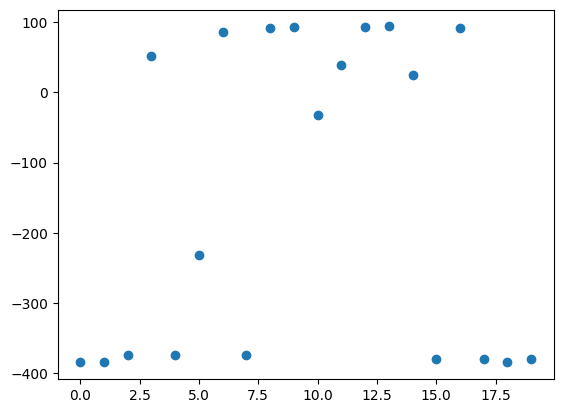

In [9]:
game = DoomGame()
game.load_config("C://Users//jason//OneDrive//Desktop//jason's file//tensor//tensorflow//Lib//site-packages//vizdoom//scenarios//basic.cfg")
game.init()
lr = 0.001
n_games = 10
agent = Agent(gamma=0.99, epsilon=1.0, lr=lr,
              input_dims=(240,320), n_actions=3, mem_size=1000, batch_size=64, epsilon_end=0.01)
scores=[]
eps_history=[]

episodes = 20
for i in range(episodes):
    done = False
    score = 0
    game.new_episode()
    while not game.is_episode_finished():
        action_space = [0,0,0]
        state = game.get_state()
        img = (state.screen_buffer)[0]
        misc = state.game_variables
        action = agent.choose_action(img)
        action_space[action] = 1
        reward = game.make_action(action_space)
        score += reward
        img_ = (state.screen_buffer)[0]
        agent.store_transition(img, action, reward, img_, done)
        print(score)
        #plt.imshow(img)
        time.sleep(0.02)
    agent.learn()
    scores.append(score)
    print("Final score:", score)
    time.sleep(2)
agent.save_model()
plt.scatter([i for i in range(len(scores))],scores)
plt.show()